TABLE OF CONTENTS

- 1.	Import libraries, define path, and import DataFrame.
- 2.	Look for and address any Personally Identifiable Information (PII)
    - 2a. Display the column headings.
    - 2b. Display basic information about the DataFrame.
    - 2c. Display DataFrame output.
- 3.	Create a regional segmentation of the data and determine if there’s a difference in spending habits between the different US regions.
    - 3a. Create a region column based on the state column.
    - 3b. Determine if there’s a difference in spending habits between the 4 regions.
- 4.	The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app.
    - 4a. Create an exclusion flag for low-activity customers (customers with less than 5 orders)
    - 4b. Export the low-activity customers sample
    - 4c. Remove the low-activity customers from the main dataframe

# 1. Import Libraries, define path & import dataframe

In [1]:
## Import libraries

import pandas as pd
import numpy as np
import os

## Define path

path = r'/Users/aislingm/Documents/02-08-2023 Instacart Basket Analysis'

## Import Dataframe

df_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ic_basket_merged.pkl'))

# 2. Look for and address any Personally Identifiable Information (PII)

In [2]:
## Display the column headings of my dataframe using the columns attribute

print(df_all.columns)

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_spend', 'spending_level', 'median_days_since_prior',
       'order_frequency_level'],
      dtype='object')


In [3]:
## Display basic information about the DataFrame using the info() method

df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 30 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   user_id                  object 
 1   gender                   object 
 2   state                    object 
 3   age                      int64  
 4   date_joined              object 
 5   n_dependants             int64  
 6   fam_status               object 
 7   income                   int64  
 8   order_id                 int64  
 9   order_number             int64  
 10  orders_day_of_week       int64  
 11  order_hour_of_day        int64  
 12  days_since_prior_order   float64
 13  product_id               int64  
 14  add_to_cart_order        int64  
 15  reordered                int64  
 16  product_name             object 
 17  aisle_id                 int64  
 18  department_id            int64  
 19  prices                   float64
 20  price_range_loc          object 
 21  busies

In [4]:
## Display dataframe output using the head() function

df_all.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,order_id,order_number,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spend,spending_level,median_days_since_prior,order_frequency_level
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular Customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular Customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular Customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular Customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Mid-range product,Regularly busy,Least busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular Customer


In [5]:
## My current dataframe has no PII.
#PII data includes Particularly sensitive are names, email addresses, physical addresses and phone numbers.
## During my data cleaning I reviewed the project brief and given there was no need to include personal information 
# I dropped the 2 PII variables that existed which were first_name and surnam. There is no other PII data in my
# current Dataframe

# 3. Create a regional segmentation of the data and determine if there's a difference in spending habits between the different US regions

### Create a region column based on the state column

In [7]:
## I will check the frequency of the state column to cross refernce results with my new region column
# once it's created and populated

df_all['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [8]:
## I will now use If-Statements with For_loops.

# Create and empty list region which acts as an empty shell where I will place the results from my loop

region = []

for value in df_all['state']:
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('South')
    else:
        region.append('West')
        
# Now we need to combine this with our dataframe so we can use it effectively. To do so we create the new region column
# within our dataframe and set it equal to region

df_all['region'] = region

In [9]:
## Check new dataframe

df_all.shape

print(df_all.columns)

df_all.info

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_spend', 'spending_level', 'median_days_since_prior',
       'order_frequency_level', 'region'],
      dtype='object')


<bound method DataFrame.info of          user_id  gender     state  age date_joined  n_dependants fam_status  \
0          26711  Female  Missouri   48    1/1/2017             3    married   
1          26711  Female  Missouri   48    1/1/2017             3    married   
2          26711  Female  Missouri   48    1/1/2017             3    married   
3          26711  Female  Missouri   48    1/1/2017             3    married   
4          26711  Female  Missouri   48    1/1/2017             3    married   
...          ...     ...       ...  ...         ...           ...        ...   
32404854   80148  Female  New York   55    4/1/2020             1    married   
32404855   80148  Female  New York   55    4/1/2020             1    married   
32404856   80148  Female  New York   55    4/1/2020             1    married   
32404857   80148  Female  New York   55    4/1/2020             1    married   
32404858   80148  Female  New York   55    4/1/2020             1    married   

       

In [10]:
## All that is left to check is the frequency of our new column: if we compare to the frequency of our state column we 
# can confirm our newly created column is accurate.

df_all['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [11]:
# I will export my latest dataframe before continuing to ensure we always have access to the most up 
# to date dataframe.

df_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_region.pkl'))

### Determine if there's a difference in spending habits between the 4 regions

In [12]:
crosstab = pd.crosstab(df_all['region'], df_all['spending_level'], dropna = False)

In [15]:
# copy the table to your clipboard and paste into Excel

crosstab.to_clipboard()

# By copying the data into excel I was able to get a better insight as to what the data looked like. Based on this
# I concluded it made more sense to make the comparison on spending habits between regions based on the ration of High and Low spender per region.
# See the code and resulting graph below:
# Note I need to import the visualization libraries before proceding:

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

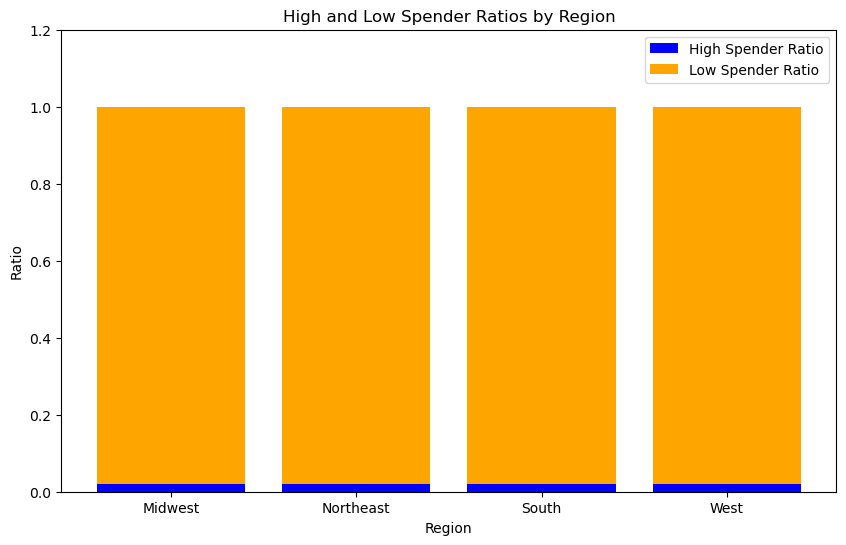

In [22]:
# Create DataFrame
data = {
    "Region": ["Midwest", "Northeast", "South", "West"],
    "High spender": [155975, 108225, 209691, 160354],
    "Low spender": [7441350, 5614511, 10582194, 8132559]
}

df = pd.DataFrame(data)

# Calculate Ratios

df["High Spender Ratio"] = df["High spender"] / (df["High spender"] + df["Low spender"])
df["Low Spender Ratio"] = df["Low spender"] / (df["High spender"] + df["Low spender"])

# Generate the Graph

plt.figure(figsize=(10, 6))

plt.bar(df["Region"], df["High Spender Ratio"], label="High Spender Ratio", color='blue')
plt.bar(df["Region"], df["Low Spender Ratio"], bottom=df["High Spender Ratio"], label="Low Spender Ratio", color='orange')

plt.xlabel("Region")
plt.ylabel("Ratio")
plt.title("High and Low Spender Ratios by Region")
plt.ylim(0, 1.2)  # Set y-axis range between 0 and 1 for ratios
plt.legend()

# Define save location

save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'high_low_spender_ratio_region.png')

# Save chart

plt.savefig(save_path)

# Show the chart

plt.show()


# In this code, I've added a second bar call to plot the low spender ratios on top of the high spender ratios, 
# using the bottom parameter to stack them. The label parameter is used to label each bar series, 
# and the legend() function is used to display a legend indicating which color corresponds to which spender ratio.

# The result will be a grouped bar chart showing both the high and low spender ratios for each region, 
# allowing you to visually compare the two ratios side by side.

In [17]:
# Determine whether there’s a difference in spending habits between the different U.S. regions.

# based on the ratio for high and low sepnder by region there is no difference. The high ratio spender for
# all regions is 2% and the low ratio spender for all regions is 98%


# 4 The IC CFO is not insterested in customers who don't generate much revenue for the ap. Create an exclusion flag for low_activity customers with less than 5 orders

In [23]:
### There are 2 approches I can take here (that I am familiar with). I could use a loop or .loc function for conditional assignments
# Here is a summary of both approches:

# Using a loop:
# Pros:
# Works without any external libraries.
#More explicit if you're new to programming or need to understand each step.
#Cons:
#Involves an explicit loop, which might be less efficient for large DataFrames.

# Using .loc for conditional assignment:
#Pros:
#More concise and idiomatic.
#Generally more efficient, especially for larger DataFrames.
#Better adheres to pandas best practices.
#Cons:
#Requires some familiarity with pandas' .loc syntax.

# In the previous task I choose to use a loop so that's why I am now choosing the .loc function

### Create an exclusion flag for low_activity customers

In [24]:
## I will make sure I am using the latest dataframe:

df_all.shape

print(df_all.columns)

df_all.info


Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_spend', 'spending_level', 'median_days_since_prior',
       'order_frequency_level', 'region'],
      dtype='object')


<bound method DataFrame.info of          user_id  gender     state  age date_joined  n_dependants fam_status  \
0          26711  Female  Missouri   48    1/1/2017             3    married   
1          26711  Female  Missouri   48    1/1/2017             3    married   
2          26711  Female  Missouri   48    1/1/2017             3    married   
3          26711  Female  Missouri   48    1/1/2017             3    married   
4          26711  Female  Missouri   48    1/1/2017             3    married   
...          ...     ...       ...  ...         ...           ...        ...   
32404854   80148  Female  New York   55    4/1/2020             1    married   
32404855   80148  Female  New York   55    4/1/2020             1    married   
32404856   80148  Female  New York   55    4/1/2020             1    married   
32404857   80148  Female  New York   55    4/1/2020             1    married   
32404858   80148  Female  New York   55    4/1/2020             1    married   

       

In [25]:
## Now that I know the dataframe I am working with is the same one i was working with last nighht I wll proceed
# to create an exclusion flag for low_activity customers and exclude it from my dataframe

In [28]:
df_all.loc[df_all['max_order'] < 5, 'activity'] = 'low_activity'

In [29]:
df_all.loc[df_all['max_order'] >= 5, 'activity'] = 'high_activity'

In [30]:
## Check results's frequency

df_all['activity'].value_counts(dropna = False)

high_activity    30964564
low_activity      1440295
Name: activity, dtype: int64

In [31]:
## Check the shape of our dataframe to ensure our newly created exclusion flag is showing

df_all.shape

(32404859, 32)

In [32]:
## the above results confirms our newly created column 

### Create a new subset and export the sample

In [35]:
## Create a subset for low_activity customers

low_activity_subset = df_all[df_all['activity'] == 'low_activity']

## Export the new subset 

low_activity_subset.to_pickle(os.path.join(path, '02 Data','Prepared Data','Low_activity_Customers.pkl'))

In [34]:
low_activity_subset.shape

(1440295, 32)

In [36]:
# Exclude the low_activity subset from the original DataFrame

df_all_4 = df_all[df_all['activity'] == 'high_activity']

In [37]:
# Check the new dataframe:

df_all_4.shape

(30964564, 32)

In [38]:
# The number of rows matches the frequency results for high_activity output on line 30

### Export the latest dataframe where low_activity customers are excluded

In [39]:
df_all_4.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_high.pkl'))